In [1]:
#Using Diabetes dataset to predict the average blood pressure level for diabetes patients
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#Converting dataset to Pandas Dataframe
import pandas as pd
diabetes_data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

#Seeing the shape of the dataframe
diabetes_data.shape

(442, 10)

In [2]:
#Looking at the first 5 rows of the dataset
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
#Adding Median Price Column because it wasn't given in our dataset
diabetes_data["Blood Pressure"] = diabetes.target*100

#transpose() would add the new column to our dataset
diabetes_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [5]:
#Setting up our data for training and testing
X = diabetes_data.iloc[:,:-1]
y = diabetes_data["Blood Pressure"]

from sklearn.model_selection import train_test_split
#Split the data into 80% training and 20% testing. 
#The random_state allows us to make the same random split every time.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=327)
print('Training data size: (%i,%i)' % X_train.shape)
print('Testing data size: (%i,%i)' % X_test.shape)

Training data size: (353,10)
Testing data size: (89,10)


In [6]:
#Scale the data to give a mean of zero and a unified standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Training set mean by feature:')
print(X_train.mean(axis=0))
print('Training set standard deviation by feature:')
print(X_train.std(axis=0))

Training set mean by feature:
[-1.76126032e-17  7.54825852e-18  1.00643447e-17  5.03217235e-17
 -2.89349910e-17  2.26447756e-17 -5.03217235e-18  1.25804309e-17
 -7.54825852e-18 -2.01286894e-17]
Training set standard deviation by feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Fitting the Regression Model
intercept = regression_model.intercept_
coef = pd.DataFrame(regression_model.coef_, index=diabetes.feature_names, columns=['Coefficients'])
print('Intercept = %f\n' % intercept)
print(coef)

Intercept = 15127.195467

     Coefficients
age    168.813322
sex  -1079.915788
bmi   2480.399465
bp    1378.119030
s1   -3108.492284
s2    1763.874470
s3     278.482641
s4     685.792186
s5    3799.116004
s6     109.684471


In [10]:
#Testing the validity of the performance of our model by seeing how far off it is from the true Blood Pressure level
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = regression_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %f' % test_rmse)

Test RMSE: 5527.810024


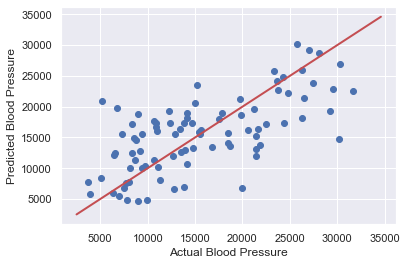

In [12]:
#Predicted vs Actual Median Blood Pressure level for Diabetes dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.scatter(y_test,y_pred)
plt.plot([2500,34600],[2500,34600],'r',lw=2)
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.show()